In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "Î∂ÄÏÇ∞ÏßÑÍµ¨"
region_code = "8"
target_date = "2017-01-05"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("Î∂ÄÏÇ∞ÏßÑÍµ¨2017_1q.csv", index=False, encoding="utf-8-sig")


ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2017-01-05   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   7425   Î∂ÄÏÇ∞ÏßÑÍµ¨   7425   Î∂ÄÏÇ∞ÏßÑÍµ¨   
1   2017-01-05     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   5823   Î∂ÄÏÇ∞ÏßÑÍµ¨   5823   Î∂ÄÏÇ∞ÏßÑÍµ¨   
2   2017-01-05    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   2976   Î∂ÄÏÇ∞ÏßÑÍµ¨   2976   Î∂ÄÏÇ∞ÏßÑÍµ¨   
3   2017-01-05     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   3290   Î∂ÄÏÇ∞ÏßÑÍµ¨   3290   Î∂ÄÏÇ∞ÏßÑÍµ¨   
4   2017-01-05    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   7990   Î∂ÄÏÇ∞ÏßÑÍµ¨   7990   Î∂ÄÏÇ∞ÏßÑÍµ¨   
5   2017-01-05     ÎåÄÌåå                      1.0„éè   4983   Î∂ÄÏÇ∞ÏßÑÍµ¨   4983   Î∂ÄÏÇ∞ÏßÑÍµ¨   
6   2017-01-05   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g  13950   Î∂ÄÏÇ∞ÏßÑÍµ¨  13950   Î∂ÄÏÇ∞ÏßÑÍµ¨   
7   2017-01-05     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   4365   Î∂ÄÏÇ∞ÏßÑÍµ¨   4365   Î∂ÄÏÇ∞ÏßÑÍµ¨   
8   2017-01-05     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    676   Î∂ÄÏÇ∞ÏßÑÍµ¨    676   Î∂ÄÏÇ∞ÏßÑÍµ¨   
9   2017-01-05     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1320   Î∂ÄÏÇ∞ÏßÑÍµ¨   1320   Î∂ÄÏÇ∞ÏßÑÍµ¨   
10  2017-01-05      Î¨¥                   2.0„éè 1Í∞ú   5377   Î∂ÄÏÇ∞ÏßÑÍµ¨   5377   Î∂ÄÏÇ∞ÏßÑÍµ¨   
11  2017-01-05    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3290   Î∂ÄÏÇ∞ÏßÑÍµ¨   3290   Î∂ÄÏÇ∞ÏßÑÍµ¨   
12  2017-01-05     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   3225   Î∂ÄÏÇ∞ÏßÑÍµ¨   3225   Î∂ÄÏÇ∞ÏßÑÍµ¨   
13  2017-01-05      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  28542   Î∂ÄÏÇ∞ÏßÑÍµ¨  28542   Î∂ÄÏÇ∞ÏßÑÍµ¨   
14  2017-01-05     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   2790   Î∂ÄÏÇ∞ÏßÑÍµ¨   2790   Î∂ÄÏÇ∞ÏßÑÍµ¨   
15  2017-01-05  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   6490   Î∂ÄÏÇ∞ÏßÑÍµ¨   6490   Î∂ÄÏÇ∞ÏßÑÍµ¨   
16  2017-01-05   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  13500   Î∂ÄÏÇ∞ÏßÑÍµ¨  13500   Î∂ÄÏÇ∞ÏßÑÍµ¨   
17  2017-01-05     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  13697   Î∂ÄÏÇ∞ÏßÑÍµ¨  13697   Î∂ÄÏÇ∞ÏßÑÍµ¨   
18  2017-01-05    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   2450   Î∂ÄÏÇ∞ÏßÑÍµ¨   2450   Î∂ÄÏÇ∞ÏßÑÍµ¨   
19  2017-01-05     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1630   Î∂ÄÏÇ∞ÏßÑÍµ¨   1630   Î∂ÄÏÇ∞ÏßÑÍµ¨   
20  2017-01-05     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1130   Î∂ÄÏÇ∞ÏßÑÍµ¨   1130   Î∂ÄÏÇ∞ÏßÑÍµ¨   
21  2017-01-05    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  49950   Î∂ÄÏÇ∞ÏßÑÍµ¨  49950   Î∂ÄÏÇ∞ÏßÑÍµ¨   
22  2017-01-05    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   6950   Î∂ÄÏÇ∞ÏßÑÍµ¨   6950   Î∂ÄÏÇ∞ÏßÑÍµ¨   
23  2017-01-05      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  35900   Î∂ÄÏÇ∞ÏßÑÍµ¨  35900   Î∂ÄÏÇ∞ÏßÑÍµ¨   
24  2017-01-05     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   1774   Î∂ÄÏÇ∞ÏßÑÍµ¨   1774   Î∂ÄÏÇ∞ÏßÑÍµ¨   
25  2017-01-05     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    730   Î∂ÄÏÇ∞ÏßÑÍµ¨    730   Î∂ÄÏÇ∞ÏßÑÍµ¨   
26  2017-01-05    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   7250   Î∂ÄÏÇ∞ÏßÑÍµ¨   7250   Î∂ÄÏÇ∞ÏßÑÍµ¨   
27  2017-01-05   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2980   Î∂ÄÏÇ∞ÏßÑÍµ¨   2980   Î∂ÄÏÇ∞ÏßÑÍµ¨   
28  2017-01-05     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2990   Î∂ÄÏÇ∞ÏßÑÍµ¨   2990   Î∂ÄÏÇ∞ÏßÑÍµ¨   
29  2017-01-05    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  17900   Î∂ÄÏÇ∞ÏßÑÍµ¨  17900   Î∂ÄÏÇ∞ÏßÑÍµ¨   

    Í∞ÄÍ≤©Ï∞®Ïù¥ Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0      0    0.0%   7,425  
1      0    0.0%   5,823  
2      0    0.0%   2,976  
3      0    0.0%   3,290  
4      0    0.0%   7,990  
5      0    0.0%   4,983  
6      0    0.0%  13,950  
7      0    0.0%   4,365  
8      0    0.0%     676  
9      0    0.0%   1,320  
10     0    0.0%   5,377  
11     0    0.0%   3,290  
12     0    0.0%   3,225  
13     0    0.0%  28,542  
14     0    0.0%   2,790  
15     0    0.0%   6,490  
16     0    0.0%  13,500  
17     0    0.0%  13,697 

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "Î∂ÄÏÇ∞ÏßÑÍµ¨"
region_code = "8"
target_date = "2017-04-13"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("Î∂ÄÏÇ∞ÏßÑÍµ¨2017_2q.csv", index=False, encoding="utf-8-sig")


ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2017-04-13   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg  14850   Î∂ÄÏÇ∞ÏßÑÍµ¨  14850   Î∂ÄÏÇ∞ÏßÑÍµ¨   
1   2017-04-13     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   5818   Î∂ÄÏÇ∞ÏßÑÍµ¨   5818   Î∂ÄÏÇ∞ÏßÑÍµ¨   
2   2017-04-13    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   6655   Î∂ÄÏÇ∞ÏßÑÍµ¨   6655   Î∂ÄÏÇ∞ÏßÑÍµ¨   
3   2017-04-13     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   2990   Î∂ÄÏÇ∞ÏßÑÍµ¨   2990   Î∂ÄÏÇ∞ÏßÑÍµ¨   
4   2017-04-13    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   5790   Î∂ÄÏÇ∞ÏßÑÍµ¨   5790   Î∂ÄÏÇ∞ÏßÑÍµ¨   
5   2017-04-13     ÎåÄÌåå                      1.0„éè   4983   Î∂ÄÏÇ∞ÏßÑÍµ¨   4983   Î∂ÄÏÇ∞ÏßÑÍµ¨   
6   2017-04-13   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g  14950   Î∂ÄÏÇ∞ÏßÑÍµ¨  14950   Î∂ÄÏÇ∞ÏßÑÍµ¨   
7   2017-04-13     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   4365   Î∂ÄÏÇ∞ÏßÑÍµ¨   4365   Î∂ÄÏÇ∞ÏßÑÍµ¨   
8   2017-04-13     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    676   Î∂ÄÏÇ∞ÏßÑÍµ¨    676   Î∂ÄÏÇ∞ÏßÑÍµ¨   
9   2017-04-13     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1400   Î∂ÄÏÇ∞ÏßÑÍµ¨   1400   Î∂ÄÏÇ∞ÏßÑÍµ¨   
10  2017-04-13      Î¨¥                   2.0„éè 1Í∞ú   2948   Î∂ÄÏÇ∞ÏßÑÍµ¨   2948   Î∂ÄÏÇ∞ÏßÑÍµ¨   
11  2017-04-13    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3290   Î∂ÄÏÇ∞ÏßÑÍµ¨   3290   Î∂ÄÏÇ∞ÏßÑÍµ¨   
12  2017-04-13     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   8277   Î∂ÄÏÇ∞ÏßÑÍµ¨   8277   Î∂ÄÏÇ∞ÏßÑÍµ¨   
13  2017-04-13      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  11900   Î∂ÄÏÇ∞ÏßÑÍµ¨  11900   Î∂ÄÏÇ∞ÏßÑÍµ¨   
14  2017-04-13     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   2990   Î∂ÄÏÇ∞ÏßÑÍµ¨   2990   Î∂ÄÏÇ∞ÏßÑÍµ¨   
15  2017-04-13  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   6490   Î∂ÄÏÇ∞ÏßÑÍµ¨   6490   Î∂ÄÏÇ∞ÏßÑÍµ¨   
16  2017-04-13   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  13500   Î∂ÄÏÇ∞ÏßÑÍµ¨  13500   Î∂ÄÏÇ∞ÏßÑÍµ¨   
17  2017-04-13     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  15464   Î∂ÄÏÇ∞ÏßÑÍµ¨  15464   Î∂ÄÏÇ∞ÏßÑÍµ¨   
18  2017-04-13    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   2450   Î∂ÄÏÇ∞ÏßÑÍµ¨   2450   Î∂ÄÏÇ∞ÏßÑÍµ¨   
19  2017-04-13     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1580   Î∂ÄÏÇ∞ÏßÑÍµ¨   1580   Î∂ÄÏÇ∞ÏßÑÍµ¨   
20  2017-04-13     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1190   Î∂ÄÏÇ∞ÏßÑÍµ¨   1190   Î∂ÄÏÇ∞ÏßÑÍµ¨   
21  2017-04-13    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  49950   Î∂ÄÏÇ∞ÏßÑÍµ¨  49950   Î∂ÄÏÇ∞ÏßÑÍµ¨   
22  2017-04-13    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   3588   Î∂ÄÏÇ∞ÏßÑÍµ¨   3588   Î∂ÄÏÇ∞ÏßÑÍµ¨   
23  2017-04-13      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  35900   Î∂ÄÏÇ∞ÏßÑÍµ¨  35900   Î∂ÄÏÇ∞ÏßÑÍµ¨   
24  2017-04-13     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   1893   Î∂ÄÏÇ∞ÏßÑÍµ¨   1893   Î∂ÄÏÇ∞ÏßÑÍµ¨   
25  2017-04-13     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    730   Î∂ÄÏÇ∞ÏßÑÍµ¨    730   Î∂ÄÏÇ∞ÏßÑÍµ¨   
26  2017-04-13    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   4990   Î∂ÄÏÇ∞ÏßÑÍµ¨   4990   Î∂ÄÏÇ∞ÏßÑÍµ¨   
27  2017-04-13   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2990   Î∂ÄÏÇ∞ÏßÑÍµ¨   2990   Î∂ÄÏÇ∞ÏßÑÍµ¨   
28  2017-04-13     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2990   Î∂ÄÏÇ∞ÏßÑÍµ¨   2990   Î∂ÄÏÇ∞ÏßÑÍµ¨   
29  2017-04-13    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  19900   Î∂ÄÏÇ∞ÏßÑÍµ¨  19900   Î∂ÄÏÇ∞ÏßÑÍµ¨   

    Í∞ÄÍ≤©Ï∞®Ïù¥ Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0      0    0.0%  14,850  
1      0    0.0%   5,818  
2      0    0.0%   6,655  
3      0    0.0%   2,990  
4      0    0.0%   5,790  
5      0    0.0%   4,983  
6      0    0.0%  14,950  
7      0    0.0%   4,365  
8      0    0.0%     676  
9      0    0.0%   1,400  
10     0    0.0%   2,948  
11     0    0.0%   3,290  
12     0    0.0%   8,277  
13     0    0.0%  11,900  
14     0    0.0%   2,990  
15     0    0.0%   6,490  
16     0    0.0%  13,500  
17     0    0.0%  15,464 

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "Î∂ÄÏÇ∞ÏßÑÍµ¨"
region_code = "8"
target_date = "2017-07-13"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("Î∂ÄÏÇ∞ÏßÑÍµ¨2017_3q.csv", index=False, encoding="utf-8-sig")


ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2017-07-13   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg  16425   Î∂ÄÏÇ∞ÏßÑÍµ¨  16425   Î∂ÄÏÇ∞ÏßÑÍµ¨   
1   2017-07-13     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   5818   Î∂ÄÏÇ∞ÏßÑÍµ¨   5818   Î∂ÄÏÇ∞ÏßÑÍµ¨   
2   2017-07-13    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   4056   Î∂ÄÏÇ∞ÏßÑÍµ¨   4056   Î∂ÄÏÇ∞ÏßÑÍµ¨   
3   2017-07-13     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   3390   Î∂ÄÏÇ∞ÏßÑÍµ¨   3390   Î∂ÄÏÇ∞ÏßÑÍµ¨   
4   2017-07-13    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   5490   Î∂ÄÏÇ∞ÏßÑÍµ¨   5490   Î∂ÄÏÇ∞ÏßÑÍµ¨   
5   2017-07-13     ÎåÄÌåå                      1.0„éè   3316   Î∂ÄÏÇ∞ÏßÑÍµ¨   3316   Î∂ÄÏÇ∞ÏßÑÍµ¨   
6   2017-07-13   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g  16450   Î∂ÄÏÇ∞ÏßÑÍµ¨  16450   Î∂ÄÏÇ∞ÏßÑÍµ¨   
7   2017-07-13     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   4365   Î∂ÄÏÇ∞ÏßÑÍµ¨   4365   Î∂ÄÏÇ∞ÏßÑÍµ¨   
8   2017-07-13     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    676   Î∂ÄÏÇ∞ÏßÑÍµ¨    676   Î∂ÄÏÇ∞ÏßÑÍµ¨   
9   2017-07-13     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1400   Î∂ÄÏÇ∞ÏßÑÍµ¨   1400   Î∂ÄÏÇ∞ÏßÑÍµ¨   
10  2017-07-13      Î¨¥                   2.0„éè 1Í∞ú   3072   Î∂ÄÏÇ∞ÏßÑÍµ¨   3072   Î∂ÄÏÇ∞ÏßÑÍµ¨   
11  2017-07-13    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3290   Î∂ÄÏÇ∞ÏßÑÍµ¨   3290   Î∂ÄÏÇ∞ÏßÑÍµ¨   
12  2017-07-13     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   9987   Î∂ÄÏÇ∞ÏßÑÍµ¨   9987   Î∂ÄÏÇ∞ÏßÑÍµ¨   
13  2017-07-13      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  21838   Î∂ÄÏÇ∞ÏßÑÍµ¨  21838   Î∂ÄÏÇ∞ÏßÑÍµ¨   
14  2017-07-13     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   2433   Î∂ÄÏÇ∞ÏßÑÍµ¨   2433   Î∂ÄÏÇ∞ÏßÑÍµ¨   
15  2017-07-13  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   6490   Î∂ÄÏÇ∞ÏßÑÍµ¨   6490   Î∂ÄÏÇ∞ÏßÑÍµ¨   
16  2017-07-13   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  13500   Î∂ÄÏÇ∞ÏßÑÍµ¨  13500   Î∂ÄÏÇ∞ÏßÑÍµ¨   
17  2017-07-13     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  19335   Î∂ÄÏÇ∞ÏßÑÍµ¨  19335   Î∂ÄÏÇ∞ÏßÑÍµ¨   
18  2017-07-13    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   2450   Î∂ÄÏÇ∞ÏßÑÍµ¨   2450   Î∂ÄÏÇ∞ÏßÑÍµ¨   
19  2017-07-13     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1580   Î∂ÄÏÇ∞ÏßÑÍµ¨   1580   Î∂ÄÏÇ∞ÏßÑÍµ¨   
20  2017-07-13     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1190   Î∂ÄÏÇ∞ÏßÑÍµ¨   1190   Î∂ÄÏÇ∞ÏßÑÍµ¨   
21  2017-07-13    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  49500   Î∂ÄÏÇ∞ÏßÑÍµ¨  49500   Î∂ÄÏÇ∞ÏßÑÍµ¨   
22  2017-07-13    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   7188   Î∂ÄÏÇ∞ÏßÑÍµ¨   7188   Î∂ÄÏÇ∞ÏßÑÍµ¨   
23  2017-07-13      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  35900   Î∂ÄÏÇ∞ÏßÑÍµ¨  35900   Î∂ÄÏÇ∞ÏßÑÍµ¨   
24  2017-07-13     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   1832   Î∂ÄÏÇ∞ÏßÑÍµ¨   1832   Î∂ÄÏÇ∞ÏßÑÍµ¨   
25  2017-07-13     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    730   Î∂ÄÏÇ∞ÏßÑÍµ¨    730   Î∂ÄÏÇ∞ÏßÑÍµ¨   
26  2017-07-13    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   4990   Î∂ÄÏÇ∞ÏßÑÍµ¨   4990   Î∂ÄÏÇ∞ÏßÑÍµ¨   
27  2017-07-13   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   3290   Î∂ÄÏÇ∞ÏßÑÍµ¨   3290   Î∂ÄÏÇ∞ÏßÑÍµ¨   
28  2017-07-13     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2990   Î∂ÄÏÇ∞ÏßÑÍµ¨   2990   Î∂ÄÏÇ∞ÏßÑÍµ¨   
29  2017-07-13    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  25900   Î∂ÄÏÇ∞ÏßÑÍµ¨  25900   Î∂ÄÏÇ∞ÏßÑÍµ¨   

    Í∞ÄÍ≤©Ï∞®Ïù¥ Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0      0    0.0%  16,425  
1      0    0.0%   5,818  
2      0    0.0%   4,056  
3      0    0.0%   3,390  
4      0    0.0%   5,490  
5      0    0.0%   3,316  
6      0    0.0%  16,450  
7      0    0.0%   4,365  
8      0    0.0%     676  
9      0    0.0%   1,400  
10     0    0.0%   3,072  
11     0    0.0%   3,290  
12     0    0.0%   9,987  
13     0    0.0%  21,838  
14     0    0.0%   2,433  
15     0    0.0%   6,490  
16     0    0.0%  13,500  
17     0    0.0%  19,335 

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "Î∂ÄÏÇ∞ÏßÑÍµ¨"
region_code = "8"
target_date = "2017-10-12"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("Î∂ÄÏÇ∞ÏßÑÍµ¨2017_4q.csv", index=False, encoding="utf-8-sig")


ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2017-10-12   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg  16135   Î∂ÄÏÇ∞ÏßÑÍµ¨  16135   Î∂ÄÏÇ∞ÏßÑÍµ¨   
1   2017-10-12     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   5818   Î∂ÄÏÇ∞ÏßÑÍµ¨   5818   Î∂ÄÏÇ∞ÏßÑÍµ¨   
2   2017-10-12    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   3934   Î∂ÄÏÇ∞ÏßÑÍµ¨   3934   Î∂ÄÏÇ∞ÏßÑÍµ¨   
3   2017-10-12     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   2780   Î∂ÄÏÇ∞ÏßÑÍµ¨   2780   Î∂ÄÏÇ∞ÏßÑÍµ¨   
4   2017-10-12    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   5290   Î∂ÄÏÇ∞ÏßÑÍµ¨   5290   Î∂ÄÏÇ∞ÏßÑÍµ¨   
5   2017-10-12     ÎåÄÌåå                      1.0„éè   4983   Î∂ÄÏÇ∞ÏßÑÍµ¨   4983   Î∂ÄÏÇ∞ÏßÑÍµ¨   
6   2017-10-12   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g  12950   Î∂ÄÏÇ∞ÏßÑÍµ¨  12950   Î∂ÄÏÇ∞ÏßÑÍµ¨   
7   2017-10-12     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   4365   Î∂ÄÏÇ∞ÏßÑÍµ¨   4365   Î∂ÄÏÇ∞ÏßÑÍµ¨   
8   2017-10-12     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    676   Î∂ÄÏÇ∞ÏßÑÍµ¨    676   Î∂ÄÏÇ∞ÏßÑÍµ¨   
9   2017-10-12     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1400   Î∂ÄÏÇ∞ÏßÑÍµ¨   1400   Î∂ÄÏÇ∞ÏßÑÍµ¨   
10  2017-10-12      Î¨¥                   2.0„éè 1Í∞ú   1986   Î∂ÄÏÇ∞ÏßÑÍµ¨   1986   Î∂ÄÏÇ∞ÏßÑÍµ¨   
11  2017-10-12    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3290   Î∂ÄÏÇ∞ÏßÑÍµ¨   3290   Î∂ÄÏÇ∞ÏßÑÍµ¨   
12  2017-10-12     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   9916   Î∂ÄÏÇ∞ÏßÑÍµ¨   9916   Î∂ÄÏÇ∞ÏßÑÍµ¨   
13  2017-10-12      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  21576   Î∂ÄÏÇ∞ÏßÑÍµ¨  21576   Î∂ÄÏÇ∞ÏßÑÍµ¨   
14  2017-10-12     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   5544   Î∂ÄÏÇ∞ÏßÑÍµ¨   5544   Î∂ÄÏÇ∞ÏßÑÍµ¨   
15  2017-10-12  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   6490   Î∂ÄÏÇ∞ÏßÑÍµ¨   6490   Î∂ÄÏÇ∞ÏßÑÍµ¨   
16  2017-10-12   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  13500   Î∂ÄÏÇ∞ÏßÑÍµ¨  13500   Î∂ÄÏÇ∞ÏßÑÍµ¨   
17  2017-10-12     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  19264   Î∂ÄÏÇ∞ÏßÑÍµ¨  19264   Î∂ÄÏÇ∞ÏßÑÍµ¨   
18  2017-10-12    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   2450   Î∂ÄÏÇ∞ÏßÑÍµ¨   2450   Î∂ÄÏÇ∞ÏßÑÍµ¨   
19  2017-10-12     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1580   Î∂ÄÏÇ∞ÏßÑÍµ¨   1580   Î∂ÄÏÇ∞ÏßÑÍµ¨   
20  2017-10-12     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1190   Î∂ÄÏÇ∞ÏßÑÍµ¨   1190   Î∂ÄÏÇ∞ÏßÑÍµ¨   
21  2017-10-12    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  49500   Î∂ÄÏÇ∞ÏßÑÍµ¨  49500   Î∂ÄÏÇ∞ÏßÑÍµ¨   
22  2017-10-12    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   5990   Î∂ÄÏÇ∞ÏßÑÍµ¨   5990   Î∂ÄÏÇ∞ÏßÑÍµ¨   
23  2017-10-12      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  32900   Î∂ÄÏÇ∞ÏßÑÍµ¨  32900   Î∂ÄÏÇ∞ÏßÑÍµ¨   
24  2017-10-12     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   2240   Î∂ÄÏÇ∞ÏßÑÍµ¨   2240   Î∂ÄÏÇ∞ÏßÑÍµ¨   
25  2017-10-12     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    730   Î∂ÄÏÇ∞ÏßÑÍµ¨    730   Î∂ÄÏÇ∞ÏßÑÍµ¨   
26  2017-10-12    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   4990   Î∂ÄÏÇ∞ÏßÑÍµ¨   4990   Î∂ÄÏÇ∞ÏßÑÍµ¨   
27  2017-10-12   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   3290   Î∂ÄÏÇ∞ÏßÑÍµ¨   3290   Î∂ÄÏÇ∞ÏßÑÍµ¨   
28  2017-10-12     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2990   Î∂ÄÏÇ∞ÏßÑÍµ¨   2990   Î∂ÄÏÇ∞ÏßÑÍµ¨   
29  2017-10-12    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  23900   Î∂ÄÏÇ∞ÏßÑÍµ¨  23900   Î∂ÄÏÇ∞ÏßÑÍµ¨   

    Í∞ÄÍ≤©Ï∞®Ïù¥ Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0      0    0.0%  16,135  
1      0    0.0%   5,818  
2      0    0.0%   3,934  
3      0    0.0%   2,780  
4      0    0.0%   5,290  
5      0    0.0%   4,983  
6      0    0.0%  12,950  
7      0    0.0%   4,365  
8      0    0.0%     676  
9      0    0.0%   1,400  
10     0    0.0%   1,986  
11     0    0.0%   3,290  
12     0    0.0%   9,916  
13     0    0.0%  21,576  
14     0    0.0%   5,544  
15     0    0.0%   6,490  
16     0    0.0%  13,500  
17     0    0.0%  19,264 

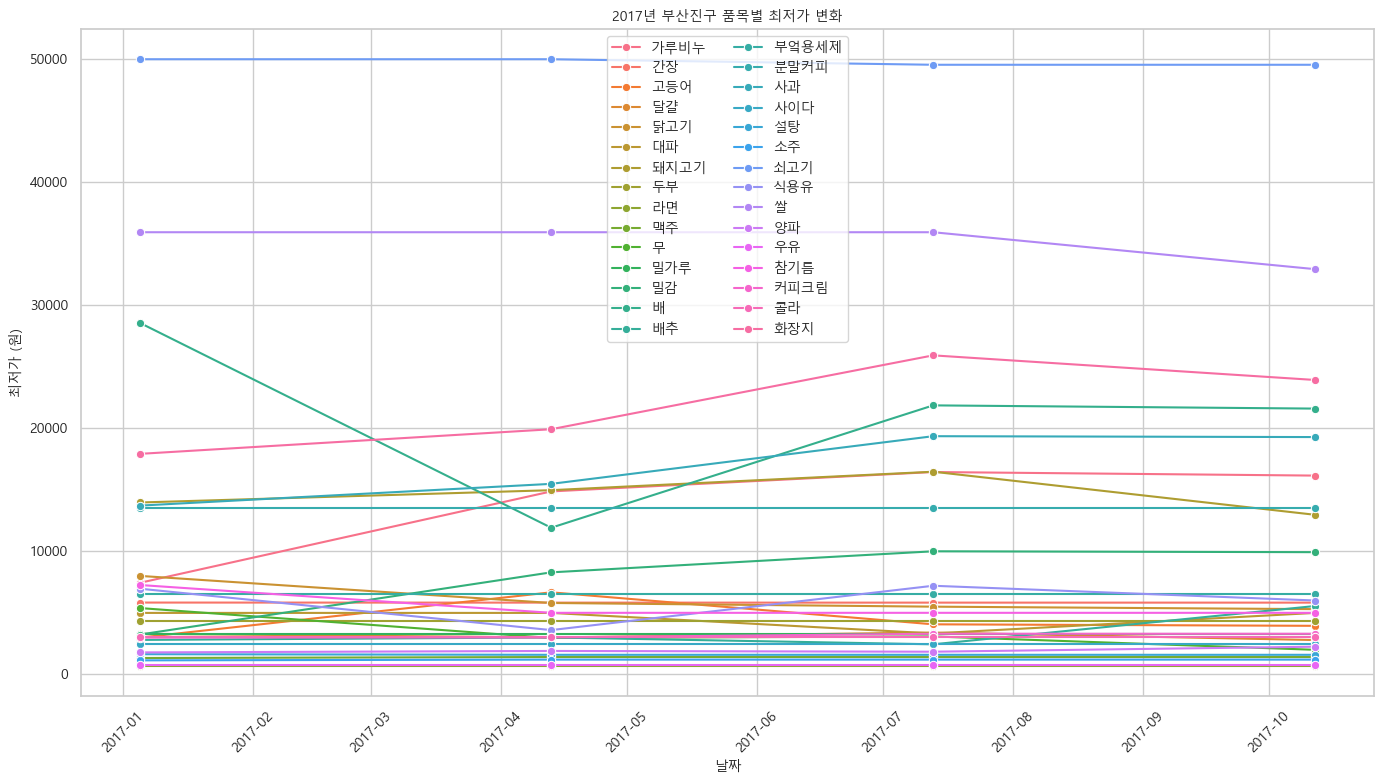

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# üìå Í∞ïÏ†úÎ°ú Ìè∞Ìä∏ ÏßÄÏ†ï
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
q1 = pd.read_csv("Î∂ÄÏÇ∞ÏßÑÍµ¨2017_1q.csv")
q2 = pd.read_csv("Î∂ÄÏÇ∞ÏßÑÍµ¨2017_2q.csv")
q3 = pd.read_csv("Î∂ÄÏÇ∞ÏßÑÍµ¨2017_3q.csv")
q4 = pd.read_csv("Î∂ÄÏÇ∞ÏßÑÍµ¨2017_4q.csv")

# ÌïòÎÇòÎ°ú Ìï©ÏπòÍ∏∞
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["ÎÇ†Ïßú"] = pd.to_datetime(df_all["ÎÇ†Ïßú"])

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# ÏÑ†Í∑∏ÎûòÌîÑ
sns.lineplot(data=df_all, x="ÎÇ†Ïßú", y="ÏµúÏ†ÄÍ∞Ä", hue="ÌíàÎ™©", marker="o")

# Í∑∏ÎûòÌîÑ Íæ∏ÎØ∏Í∏∞ (Ïó¨Í∏∞ÏÑú FontProperties Ï†ÅÏö©!)
plt.title("2017ÎÖÑ Î∂ÄÏÇ∞ÏßÑÍµ¨ ÌíàÎ™©Î≥Ñ ÏµúÏ†ÄÍ∞Ä Î≥ÄÌôî", fontsize=16, fontproperties=font_prop)
plt.xlabel("ÎÇ†Ïßú", fontproperties=font_prop)
plt.ylabel("ÏµúÏ†ÄÍ∞Ä (Ïõê)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()


# df_allÏùÑ Ï†ÄÏû•ÌïòÎäî ÏΩîÎìú
df_all.to_csv("Î∂ÄÏÇ∞ÏßÑÍµ¨2017_min.csv", index=False, encoding="utf-8-sig")

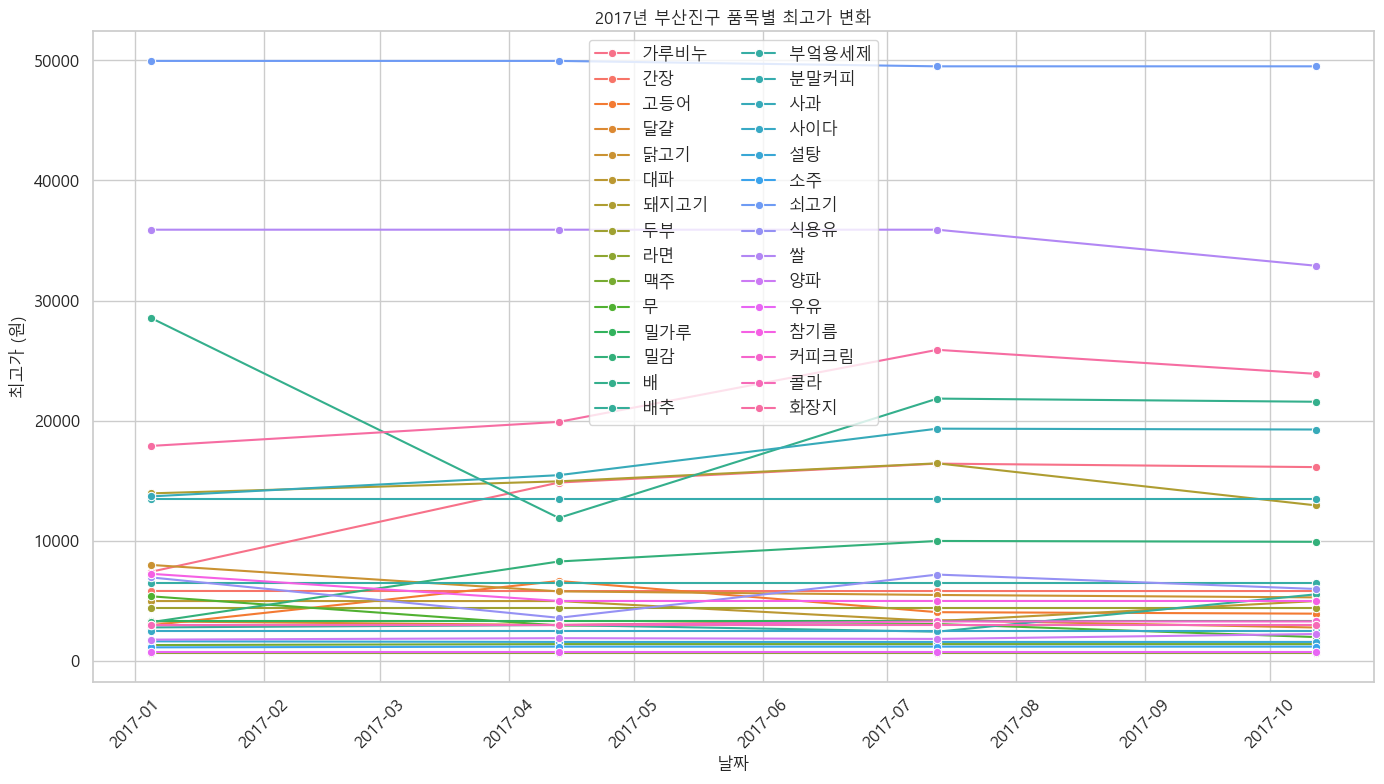

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# üìå Í∞ïÏ†úÎ°ú Ìè∞Ìä∏ ÏßÄÏ†ï
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
q1 = pd.read_csv("Î∂ÄÏÇ∞ÏßÑÍµ¨2017_1q.csv")
q2 = pd.read_csv("Î∂ÄÏÇ∞ÏßÑÍµ¨2017_2q.csv")
q3 = pd.read_csv("Î∂ÄÏÇ∞ÏßÑÍµ¨2017_3q.csv")
q4 = pd.read_csv("Î∂ÄÏÇ∞ÏßÑÍµ¨2017_4q.csv")

# ÌïòÎÇòÎ°ú Ìï©ÏπòÍ∏∞
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["ÎÇ†Ïßú"] = pd.to_datetime(df_all["ÎÇ†Ïßú"])

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# ÏÑ†Í∑∏ÎûòÌîÑ
sns.lineplot(data=df_all, x="ÎÇ†Ïßú", y="ÏµúÍ≥†Í∞Ä", hue="ÌíàÎ™©", marker="o")

# Í∑∏ÎûòÌîÑ Íæ∏ÎØ∏Í∏∞ (Ïó¨Í∏∞ÏÑú FontProperties Ï†ÅÏö©!)
plt.title("2017ÎÖÑ Î∂ÄÏÇ∞ÏßÑÍµ¨ ÌíàÎ™©Î≥Ñ ÏµúÍ≥†Í∞Ä Î≥ÄÌôî", fontsize=16, fontproperties=font_prop)
plt.xlabel("ÎÇ†Ïßú", fontproperties=font_prop)
plt.ylabel("ÏµúÍ≥†Í∞Ä (Ïõê)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()

# df_allÏùÑ Ï†ÄÏû•ÌïòÎäî ÏΩîÎìú
df_all.to_csv("Î∂ÄÏÇ∞ÏßÑÍµ¨2017_max.csv", index=False, encoding="utf-8-sig")